# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [56]:
from google.colab import files
uploaded = files.upload()  # This opens an upload dialog

Saving housing_price_data.csv to housing_price_data.csv


In [57]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


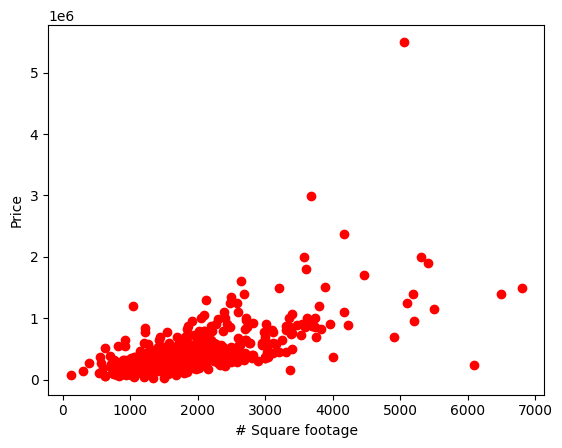

In [64]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [65]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1))
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)
y = y.reshape(len(X),1)

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

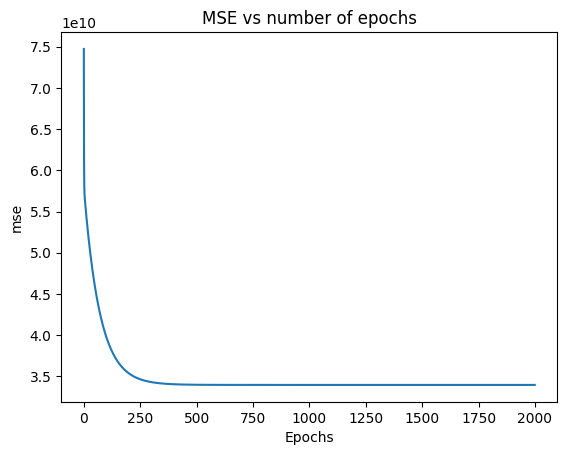

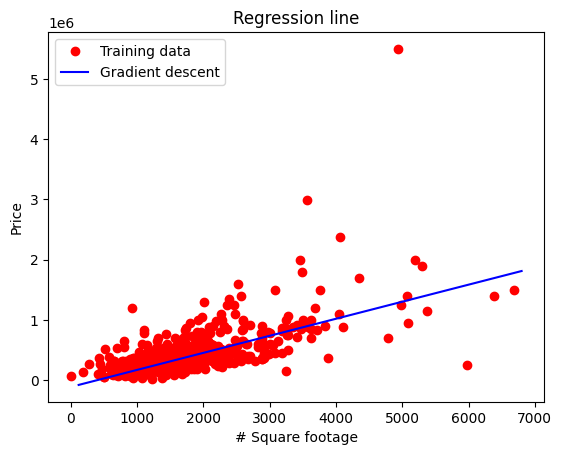

Predicted price of a 5000 square foot house is 1301937.500283298 .


In [66]:
# Initialize vector w
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.5

# Number of epochs
MAX_EPOCHS = 2000

## Your code goes here ...

length = len(y)
mse = []

# Perform batch gradient descent
# Looping for MAX_EPOCHS
for itr in range(MAX_EPOCHS):
    y_pred = X.dot(w)

    error = y_pred - y

    # Update equation
    w -= nu * (1/length) * X.T.dot(error)

    # Final values
    y_pred_final = np.dot(X, w)

    # Compute mse
    mseValue = np.sum(np.square(y_pred_final - y)) / (2 * length)

    # mse (plot)
    mse.append(mseValue)

    # Generate a graph of MSE as a function of the number of epochs

plt.plot(mse)
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.title('MSE vs number of epochs')
plt.show()

# Plot the regression line over the training examples

plt.plot(X[:,1] * max_min, y, 'ro', label='Training data')
plt.plot(Xsort[:,1] *max_min + Xmin, np.dot(np.sort(X, axis=0),w), 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.title('Regression line')
plt.show()

size = 5000
normalized_size = (size-Xmin) / max_min
predicted_price = (w[0] + w[1]*normalized_size)[0]
print(f'Predicted price of a {size} square foot house is {predicted_price} .')